<a href="https://www.kaggle.com/code/suryan5h/expedition-deaths-eda-cleaning?scriptVersionId=93859064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/himalayan-expeditions/summiters.csv
/kaggle/input/himalayan-expeditions/expeditions.csv
/kaggle/input/himalayan-expeditions/peaks.csv
/kaggle/input/himalayan-expeditions/deaths.csv


In [110]:
df = pd.read_csv('/kaggle/input/himalayan-expeditions/deaths.csv')
df.columns

Index(['peak_id', 'peak_name', 'name', 'yr_season', 'date', 'time',
       'citizenship', 'gender', 'age', 'is_o2_used', 'is_summiter',
       'cause_of_death'],
      dtype='object')

In [111]:
df

,peak_id,peak_name,name,yr_season,date,time,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,08:30,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,08:30,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,11:15,New Zealand,M,23,No,.,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,20:00,Switzerland,M,31,No,.,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,20:00,Switzerland,F,28,No,.,Fall (5300m)
...,...,...,...,...,...,...,...,...,...,...,...,...
1099,YALU,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,16:15,Nepal,M,29,Y,Y,Fall (8500m)
1100,YALU,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,16:15,Nepal,M,36,Y,Y,Fall (8500m)
1101,YALU,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,13:30,India,F,34,Y,.,Fall (8200m)
1102,YALU,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,13:30,Nepal,M,28,Y,.,Fall (8200m)


In [112]:
df.dtypes

peak_id           object
peak_name         object
name              object
yr_season         object
date              object
time              object
citizenship       object
gender            object
age                int64
is_o2_used        object
is_summiter       object
cause_of_death    object
dtype: object

In [113]:
df.drop('time',axis=1,inplace=True)

In [114]:
df

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31,No,.,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28,No,.,Fall (5300m)
...,...,...,...,...,...,...,...,...,...,...,...
1099,YALU,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29,Y,Y,Fall (8500m)
1100,YALU,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36,Y,Y,Fall (8500m)
1101,YALU,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34,Y,.,Fall (8200m)
1102,YALU,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28,Y,.,Fall (8200m)


In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
df.isnull().sum()

peak_id           0
peak_name         0
name              0
yr_season         0
date              0
citizenship       0
gender            0
age               0
is_o2_used        0
is_summiter       0
cause_of_death    0
dtype: int64

In [117]:
df.is_summiter.value_counts()

.    865
Y    239
Name: is_summiter, dtype: int64

In [118]:
df.is_summiter.replace('.','No',inplace=True)
df.is_summiter.value_counts()

No    865
Y     239
Name: is_summiter, dtype: int64

In [119]:
df

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,No,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,No,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,No,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31,No,No,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28,No,No,Fall (5300m)
...,...,...,...,...,...,...,...,...,...,...,...
1099,YALU,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29,Y,Y,Fall (8500m)
1100,YALU,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36,Y,Y,Fall (8500m)
1101,YALU,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34,Y,No,Fall (8200m)
1102,YALU,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28,Y,No,Fall (8200m)


In [120]:
df.peak_id.value_counts()

EVER    306
MANA     86
DHA1     85
ANN1     72
CHOY     52
       ... 
KOTA      1
KUSU      1
BAUD      1
LANR      1
KTEG      1
Name: peak_id, Length: 86, dtype: int64

In [121]:
peakidlist = df.peak_id.value_counts()
peakidlist



EVER    306
MANA     86
DHA1     85
ANN1     72
CHOY     52
       ... 
KOTA      1
KUSU      1
BAUD      1
LANR      1
KTEG      1
Name: peak_id, Length: 86, dtype: int64

In [122]:
lessthan10 = peakidlist[peakidlist<=10]
lessthan10

LSHR    10
YALU    10
ANN3     9
TILI     9
ANNS     8
        ..
KOTA     1
KUSU     1
BAUD     1
LANR     1
KTEG     1
Name: peak_id, Length: 67, dtype: int64

In [123]:
def correctPeakId(val):
    if val in lessthan10:
        return 'others'
    else:
        return val

df.peak_id = df['peak_id'].apply(correctPeakId)
df

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,No,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,No,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,No,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31,No,No,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28,No,No,Fall (5300m)
...,...,...,...,...,...,...,...,...,...,...,...
1099,others,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29,Y,Y,Fall (8500m)
1100,others,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36,Y,Y,Fall (8500m)
1101,others,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34,Y,No,Fall (8200m)
1102,others,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28,Y,No,Fall (8200m)


In [124]:
df.peak_id.value_counts()

EVER      306
others    186
MANA       86
DHA1       85
ANN1       72
CHOY       52
KANG       51
MAKA       48
PUMO       42
AMAD       32
LHOT       21
KGUR       19
LANG       16
DHA4       14
GURJ       13
MAK2       13
BARU       13
HIME       13
GANG       11
PISA       11
Name: peak_id, dtype: int64

In [125]:
df.peak_name.value_counts()

Everest          306
Manaslu           86
Dhaulagiri I      85
Annapurna I       72
Cho Oyu           52
                ... 
Kotang             1
Kusum Kanguru      1
Baudha             1
Langtang Ri        1
Kangtega           1
Name: peak_name, Length: 86, dtype: int64

In [126]:
df.age.value_counts()

0     177
33     54
35     53
28     45
26     44
27     41
36     38
30     37
34     36
31     35
29     32
32     31
25     28
41     27
37     26
23     25
24     25
39     25
38     23
43     22
22     21
42     21
45     20
44     18
40     18
48     17
50     16
47     16
49     16
46     14
51     12
52     11
53      9
57      7
54      6
60      6
58      6
20      5
62      5
21      5
63      4
19      4
56      3
66      3
59      3
55      3
61      3
71      1
17      1
69      1
81      1
85      1
64      1
67      1
18      1
Name: age, dtype: int64

In [127]:
#How can 0 be age
#Better to impute it
df.age.replace(0,np.nan,inplace=True)
df.age.isnull().sum()

177

In [128]:
df.age.describe()

count    927.000000
mean      36.077670
std       10.149764
min       17.000000
25%       28.000000
50%       34.000000
75%       42.000000
max       85.000000
Name: age, dtype: float64

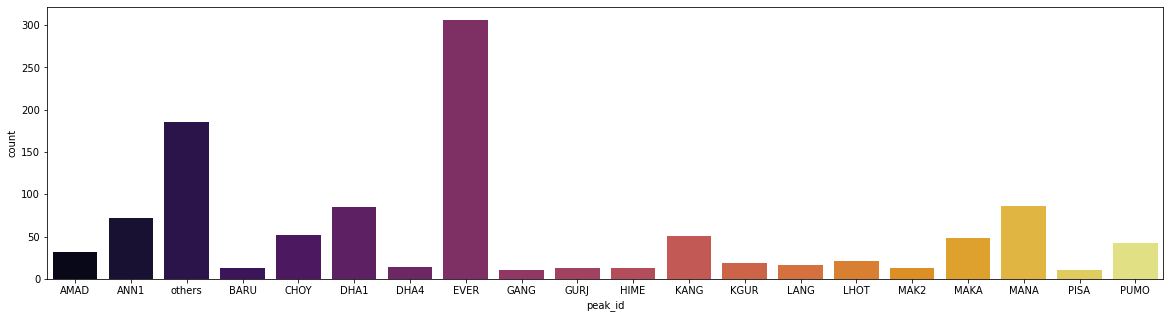

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(df.peak_id,palette='inferno')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

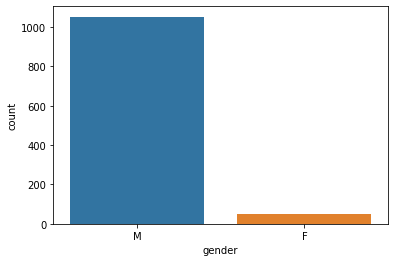

In [130]:
sns.countplot(df.gender)

In [131]:
df.head()

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33.0,No,No,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27.0,No,No,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23.0,No,No,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31.0,No,No,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28.0,No,No,Fall (5300m)


In [132]:
df.cause_of_death.unique()

array(['Fall (6550m)', 'Avalanche (6100m)', 'Fall (5300m)',
       'Fall (5900m)', 'Fall (6200m)', 'Fall (6750m)', 'Fall (6000m)',
       'AMS (4600m)', 'Fall (6080m)', 'Avalanche (6400m)',
       'Unknown (3400m)', 'Fall (6050m)', 'Fall (6100m)', 'AMS (6200m)',
       'Illness (non-AMS) (6000m)', 'Falling Rock/Ice (6400m)',
       'Falling Rock/Ice (6300m)', 'Other (6800m)', 'Fall (6300m)',
       'AMS (6000m)', 'Falling Rock/Ice (5300m)', 'Avalanche (6700m)',
       'Avalanche (6300m)', 'Avalanche (5750m)', 'Avalanche (5500m)',
       'Fall (7300m)', 'Unknown (0m)', 'Other (6600m)',
       'Avalanche (6500m)', 'Avalanche (5650m)', 'Avalanche (5100m)',
       'Fall (7700m)', 'Illness (non-AMS) (7100m)',
       'Falling Rock/Ice (6000m)', 'Avalanche (5400m)', 'Fall (6500m)',
       'Fall (7900m)', 'Fall (7420m)', 'Falling Rock/Ice (5000m)',
       'Fall (8000m)', 'Fall (7000m)', 'Avalanche (7500m)',
       'Fall (7100m)', 'Fall (4300m)', 'Crevasse (5300m)',
       'Avalanche (5700m)', 

In [133]:
df['cause_of_death']= df['cause_of_death'].apply(lambda x:x.split()[0])
df

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33.0,No,No,Fall
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27.0,No,No,Fall
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23.0,No,No,Avalanche
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31.0,No,No,Fall
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28.0,No,No,Fall
...,...,...,...,...,...,...,...,...,...,...,...
1099,others,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29.0,Y,Y,Fall
1100,others,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36.0,Y,Y,Fall
1101,others,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34.0,Y,No,Fall
1102,others,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28.0,Y,No,Fall


In [134]:
df.cause_of_death.value_counts()

Avalanche             369
Fall                  330
AMS                   103
Illness                60
Disappearance          49
Exhaustion             42
Exposure/Frostbite     42
Other                  30
Crevasse               27
Falling                26
Icefall                16
Unknown                10
Name: cause_of_death, dtype: int64

In [135]:
df

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33.0,No,No,Fall
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27.0,No,No,Fall
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23.0,No,No,Avalanche
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31.0,No,No,Fall
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28.0,No,No,Fall
...,...,...,...,...,...,...,...,...,...,...,...
1099,others,Yalung Kang,Ang Dawa Sherpa (Solukhumbu),1989 Win,Dec 20,Nepal,M,29.0,Y,Y,Fall
1100,others,Yalung Kang,Tchiring Chumbi (Tchiring Thebe) Sherpa (Nupri...,1989 Win,Dec 20,Nepal,M,36.0,Y,Y,Fall
1101,others,Yalung Kang,Chhanda Gayen,2014 Spr,May 20,India,F,34.0,Y,No,Fall
1102,others,Yalung Kang,"Dawa Wangchu Sherpa (Tamku-5, Makalu-Barun)",2014 Spr,May 20,Nepal,M,28.0,Y,No,Fall


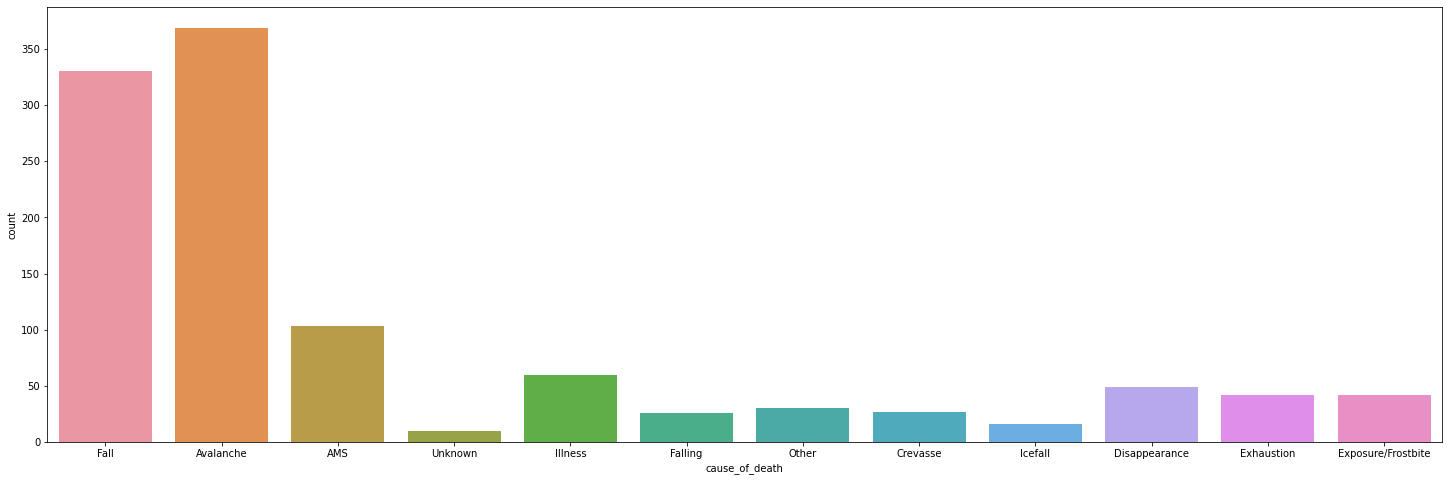

In [136]:
plt.figure(figsize=(25,8))
sns.countplot(df.cause_of_death)
plt.show()